<a href="https://colab.research.google.com/github/wodnjse/machine-learning/blob/main/Tree-Algorithm/machine_learning_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**교차 검증과 그리드 서치**
===
검증세트, 교차검증, 그리드 서치
---


# 검증 세트
- 테스트 세트는 모델을 만들고 나서 <font color= 		#0080ff>마지막에 딱 한 번만</font> 사용
- 테스트 세트를 사용하지 않으면 모델이 과대적합인지 과소적합인지 판단할 수 없음
- 테스트 세트를 사용하지 않고 이를 측정: <font color= 		#0080ff>훈련 세트를 또 나눔
  - <font color= #0080ff>검증 세트</font>(validation set)   
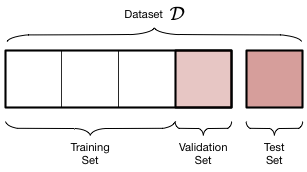


In [1]:
import pandas as pd
wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/머신러닝/와인/wine.csv')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

- class 열을 타깃으로 사용
- 나머지 열은 특성 배열에 저장

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split( 
    data, target, test_size=0.2, random_state=42
)

- 훈련 세트와 테스트 세트 나누기(80:20)

In [4]:
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state=42
)

print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


- train_input과 train_target을 다시 tarin_test_split()
- 훈련 세트 sub_input, sub_target
- 검증 세트 val_input, val_target
- tarin_input의 약 20%를 val_intput

  - > 원래 5,197개였던 훈련 세트가 <font color="FF0000">4,157</font>개로 줄었음

  - > 검증 세트는 <font color="FF0000">1,040</font>개


- sub_input, sub_target과 val_input, val_target 사용해 모델 생성 및 평가

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


> <font color="FF0000">과대적합</font>!   

> 매개변수를 바꿔서 더 좋은 모델을 찾아야 함

# 교차 검증
- 검증 세트를 만드느라 훈련 세트가 줄었음
- <font color= 	#0080ff>많은 데이터</font>를 훈련에 사용할수록 좋은 모델 생성 가능
- 검증 세트를 <font color= 	#0080ff>너무 조금</font> 떼어 놓으면 검증 점수가 들쭉날쭉 불안정
- <font color= 	#0080ff>교차 검증</font>(cross validation) 사용
  - 안정적인 검증 점수를 얻고 훈련에 더 많은 데이터 사용 가능
  - 검증 세트를 떼어 내어 평가하는 과정을 <font color= 	#0080ff>여러 번</font> 반복
  - 그 다음 이 점수를 평균하여 최종 검증 점수를 얻음

# k-폴드 교차 검증
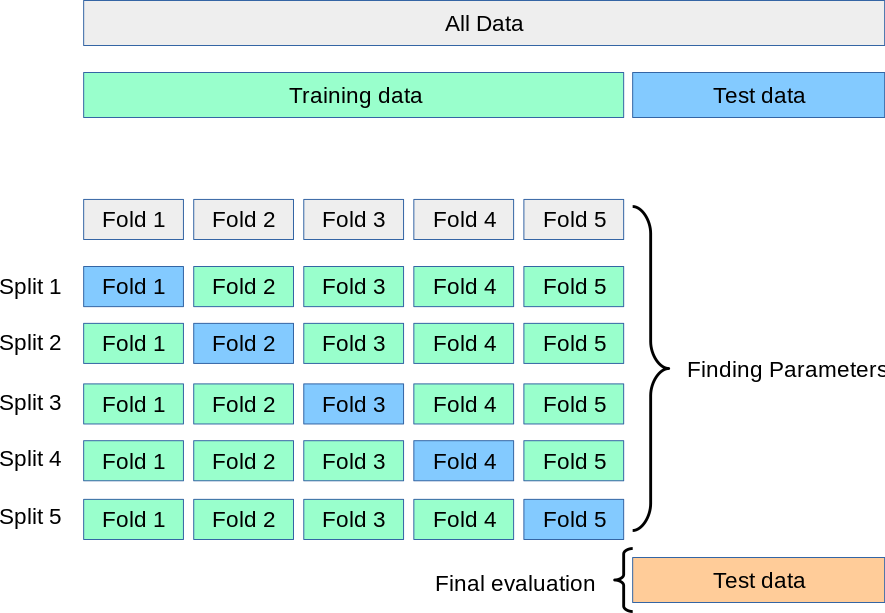
#### <font color= #ffff00>k-폴드 교차 검증</font>(k-folt cross validation)
  - 훈련 세트를 몇 부부능로 나누냐에 따라 다르게 부름
  - 보통 <font color= #ffff00>5-폴드, 10-폴드</font> 교차 검증을 많이 사용함
  - 데이터의 <font color= #ffff00>8~90%</font>까지 훈련에 사용: 안정된 점수 


# cross_validate()
- 사이킷런에서는 <font color= #ffff00>cross_validate</font>()라는 교차 검증 함수 제공
- 수작업으로 직접 검증 세트 떼어내지 않고 훈련 세트 전체를 전달
- 기본적으로 <font color= #ffff00>5-폴드</font> 교차 검증 수행
- <font color= #ffff00>fit_time</font>: 각각 모델을 검증하는 시간, 각 키마다 5개의 숫자
- <font color= #ffff00>score_time</font>: 각각 모델을 검증하는 시간, 각 키마다 5개의 숫자
- <font color= #ffff00>test_score</font>: 각 폴드에서 계산한 검증 점수
- 교차 검증의 <font color= #ffff00>최종점수</font>: test_score 키에 담긴 5개의 점수를 <font color= #ffff00>평균</font>

In [6]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00835872, 0.00708342, 0.01161695, 0.01032925, 0.00694633]), 'score_time': array([0.00073361, 0.00065708, 0.00141001, 0.00075936, 0.00065517]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


- <font color= #ffff00>fit_time</font>: 각각 모델을 훈련하는 시간, 각 키마다 5개의 숫자
- <font color= #ffff00>score_time</font>: 각각 모델을 검증하는 시간, 각 키마다 5개의 숫자
- <font color= #ffff00>test_score</font>: 각 폴드에서 계산한 검증 점수

In [8]:
import numpy as np
print(np.mean(scores['test_score']))

0.855300214703487


- 교차 검증의 최종 점수: test_scroe 키에 담긴 <font color= #ffff00>5개의 점수 평균 출력</font>
- train_test_split() 함수로 전체 데이터를 섞은 후 훈련 세트를 준비했기 때문에 따로 <font color= #ffff00>폴드를 섞을 필요 없음</font>

- <font color= #ffff00>회귀</font> 모델: <font color= #FF0000>FKold</font> 분할기 사용
- <font color= #ffff00>분류</font> 모델: <font color= #FF0000> StratifiedKFold</font> 사용 (타깃 클래스를 골고루 나누기 위해)

In [10]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


- 미리 수작업으로 폴드 나누지 않아도 결과 동일!
- <font color= #FF0000>n_splits</font> 매개변수: 몇(k) 폴드 교차 검증할지 결정

In [11]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


# 하이퍼파라미터 튜닝
- 결정 트리의 매개변수 값을 바꿔가며 가장 좋은 성능이 나오는 모델을 찾자
- 테스트 세트가 아닌 <font color= #ffff00>교차 검증</font>을 통해서 좋은 모델 찾기
- <font color= #ffff00>모델 파라미터</font>: 머신러닝 모델이 학습하는 파라미터
- <font color= #ffff00>하이퍼파라미터</font>: 모델이 학습할 수 없어서 사용자가 지정하는 파라미터
- 하이퍼파라미터를 튜닝하는 작업?
  1. 라이브러리가 제공하는 <font color= #ffff00>기본값</font> 사용
  2. 검증 세트 점수나 교차 검증을 통해 매개변수 변경
  3. 모델마다 1~6개의 매개변수 제공 👉 이를 다 바꿔가면서?
  4. max_depth 최적값이 변경하면 min_sample_split도 바뀜 👉 <font color= #ffff00>다 찾아야 함</font>

> 사이킷런의 <font color= #FF0000>GridSearchCv</font> 클래스는 하이퍼파라미터 탐색과 교차 검증을 <font color= #FF0000>한 번에 수행!</font>

# GridSearchCV 클래스
- 하이퍼파리미터 탐색과 교차 검증을 <font color= #ffff00>한 번에 수행</font>
- 별도로 cross_validate() 함수 호출 <font color= #ffff00>필요 없음</font>
- 기본 매개변수를 사용한 결정 트리 모델에서 min_impurity_decrease 매개변수의 <font color= #ffff00>최적값</font> 찾기

1. GridSearchCV 클래스 임포트
2. 탐색할 값의 리스트를 딕셔너리로 만듬(0.0001 ~ 0.0005: 0.000.1씩 증가

In [14]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

- 결정 트리 클래스를 생상하자마자 바로 GridSearchCV로 전달
- <font color= #ffff00>fit</font>() 메서드 호출: mean_impurity_decrease 값 바꿔가며 총 5번 실행
- GridSearchCV의 <font color= #ffff00>cv</font> 매개변수의 기본값은 <font color= #ffff00>5</font>
- min_impurity_decrease 값마다 5-폴드 교차 검증 수행
  : 5 x 5 = <font color= #ffff00>25개</font>의 모델 훈련
- <font color= #ffff00>n_jobs</font> 매개변수: 병렬 실행에 사용할 CPU 코어 수 (<font color= #ffff00>-1</font>: 모든 코어 사용)

In [16]:
gs = GridSearchCV(DecisionTreeClassifier(random_state= 42), params, n_jobs= -1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

- 교차 검증에서는 최적의 하이퍼파리미터를 찾으면    
  👉 전체 훈련 세트로 모델을 <font color= #ffff00>다시</font> 만들어야 했음
- 그리드 서치는 훈련이 끝나면 25개 모델 중에서 검증 점수가 <font color= #ffff00>가장 높은</font> 모델의 매개변수 조합으로 <font color= #ffff00>자동으로</font> 다시 모델을 훈련
- 이 모델은 gs 객체의 <font color= #ffff00>best_estimator_</font> 속성에 저장
  👉 일반 결정 트리처럼 똑같이 사용



---





최적의 모델은 gs 객체의 <font color= #ffff00>best_estimator_</font> 속성에 저장
  👉 일반 결정 트리처럼 똑같이 사용

In [17]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


최적의 매개변수는 <font color= #ffff00>best_params_</font> 속성에 저장

In [19]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


각 매개변수에서 수행한 교차 검증의 평균 점수는 <font color= #ffff00>cv_results_</font> 속성의 <font color= #ffff00>'mean_test_score'</font> 키에 저장

In [20]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


- 0.0001 매개변수를 사용한 평균 점수 →  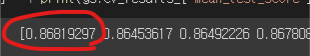

# 더 복잡한 매개변수 조합
- <font color= #ffff00>min_impurity_decrease</font>: 노드를 분할하기 위한 불순도 감소 최소량 지정
- <font color= #ffff00>max_depth</font>: 트리의 깊이 제한
- <font color= #ffff00>min_samples_split</font>: 노드를 나누기 위한 최소 샘플 수 지정

In [21]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

> 1. <font color= #f96d6d>넘파이 arange() 함수</font>: 첫 번째 매개변수 값 → 두 번째 매개변수에 도달할 때까지 세 번째 매개변수를 계속 더함
>
> 2. <font color= #f96d6d>파이썬 range() 함수</font>: 넘파이 arange()와 비슷하지만 정수만 가능
  - `range(5,20,1) = 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19`
  - `range(2,100,10) = 2, 12, 22, 32, 42, 52, 62, 72, 82, 92`

- min_impurity_decrease: 9개
- max_depth: 15개
- min_samples_split: 10개

> 1. 매개변수로 수행할 교차 검증 횟수: 9 X 15 X 10 = 1,350개
> 2. 기본적으로 5-폴드 교차 검증 수행: 1,350 X 5 = 6,770개
*n_jobs 매개변수 -1로 설정 후 <font color= #f96d6d>그리드 서치 실행*</font>(colab에서 29초 소요) 




In [22]:
gs = GridSearchCV(DecisionTreeClassifier(random_state= 42), params, n_jobs= -1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

# GridSeacrhCV + HP 튜닝 결과
최상의 매개변수 조합 결과


In [23]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


> 6,770개 모델로 교차 검증 결과 가장 좋은 결과를 내는 매개변수 값

최상의 교차 검증 점수 확인

In [24]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


# 랜덤 서치
- GrindSearch에서 매개변수의 간격을 0.0001 혹은 1로 미리 설정
- 매개변수의 값이 <font color= #ffff00>수치일 때 범위나 간격을 미리 정하기 어려움</font>
- 이럴 때 랜덤 서치(Random Search) 사용
- 매개변수 값 목록을 전달하는 것이 아니라   
  👉 매개변수를 <font color= #ffff00>샘플링</font>할 수 있는 <font color= #ffff00>확률 분포</font> 객체를 전달

> <font color= #f96d6d>싸이파이(scipy)</font>에서 2개의 확률 분포 클래스 임포트
 - 파이썬의 <font color= #f96d6d>핵심 과학 라이브러리</font> 중 하나
 - 적분, 보간, 선형 대수, 확률 등을 포함한 수치 계산 전용 라이브러리
 - 사이킷런은 넘파이와 싸이파이 기능을 많이 사용


In [26]:
from scipy.stats import uniform, randint

uniform, randint 클래스는 모두 주어진 범위에서 고르게 값을 뽑음   
  👉 <font color= #ffff00>균등 푼포에서 샘플링</font> 한다

<font color= #ffff00>randint</font>: 정수값을 뽑음   
<font color= #ffff00>uniform</font>: 실수값을 뽑음

In [27]:
rgen = randint(0,10)
rgen.rvs(10)

array([3, 0, 7, 2, 6, 0, 7, 0, 2, 9])

> <font color= #f96d6d>난수 발생기랑 유사!</font>   
0에서 10까지 범위   
10개 생성

In [28]:
ugen = uniform(0,1)
ugen.rvs(10)

array([0.59865438, 0.10278988, 0.43180899, 0.6920668 , 0.61003446,
       0.3810945 , 0.03637062, 0.46180822, 0.92150655, 0.66652138])

> <font color= #f96d6d>난수 발생기랑 유사!</font>   
- 0에서 10까지 범위(정수) / 0에서 1까지 범위(실수)
- 10개 생성

<font color= #f96d6d>min_samples_leaf</font> 매개변수 추가
  - 리프 노드가 되기 위한 최소 샘플의 개수
  - 어떤 노드가 분할하여 만들어진 자식 노드의 샘플 수가 이 값보다 작을 경우 분할하지 않음

In [31]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20,50),
          'min_samples_split': randint(2,25),
          'min_samples_leaf': randint(1,25)
          }

> - min_impurity_decrease
  : 0.0001에서 0.001 사이의 실수 샘플링
- max_depth: 20에서 50사이의 정수 샘플링
- min_samples_split: 2에서 25사이의 정수 샘플링
- min_samples_leaf: 1에서 25사이의 정수 샘플링

<font color= #ffff00>n_iter</font> 매개변수: 샘플링 횟수   
params에 정의된 매개변수 범위에서 총 100번 샘플링하여 교차 검증   
그리드 서치보다 교차 검중 수를 줄이지만, 넓은 영역 효과적으로 탐색

In [32]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state= 42), params,
                        n_iter= 100, n_jobs= -1, random_state= 42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7b0f84aa10>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7b0f84ae50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7b0faa8950>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7b0f8b1d50>},
                   random_state=42)

# 랜덤 서치 결과


최적의 매개변수 조합

In [34]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


최고의 교차 검증 점수

In [35]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


최적의 모델은 <font color= #ffff00>best_estimator_</font> 속성에 저장

이를 <font color=	#ffff00>최종 모델</font>로 결정하고 테스트 세트의 성능 확인

In [36]:
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.86
